# SVM et Sélection d'attribut



## Variables d'environement

Pensez à vérifier les variables d'environement:

In [1]:
import sys
print(sys.version)
print(sys.path)

3.5.2 (default, Nov 23 2017, 16:37:01) 
[GCC 5.4.0 20160609]
['', '/usr/lib/python35.zip', '/usr/lib/python3.5', '/usr/lib/python3.5/plat-x86_64-linux-gnu', '/usr/lib/python3.5/lib-dynload', '/usr/local/lib/python3.5/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.5/dist-packages/IPython/extensions', '/home/ethiy/.ipython']


## Séparation linéaire

Le but de cette partie est de comparer le SVM linéaire à un autre exemple de classifieur linéaire: le Perceptron. On commence d'abords par rappeler rapidement le principe du Perceptron.

### Perceptron

L'algorithm du Perceptron date des [travaux de Frank Rosenblatt](http://psycnet.apa.org/record/1959-09865-001). Le but était de modéliser l'action des neurones. Ce modèle va être ensuite utilisé pour contruire des réseaux de neurones complexes et c'est la base de toute les méthodes de Deep Learning. Le modèle donne pour chaque attribut $i \in \{1,2, \dots,d\}$ de la donnée d'entrée $x = \begin{pmatrix}x_1\\ x_2\\ \vdots \\x_d\end{pmatrix}$ un poids $w_i$. Pour chaque entrée $x$ on lui applique linéairement un vecteur de poids $w = \begin{pmatrix}w_1\\ w_2\\ \vdots \\w_d\end{pmatrix}$ pour lui attribuer un score $s = \langle w \vert x\rangle = \sum_{i=1,\dots,d}w_i.x_i$. Suite à ce score obtenu, on prends une décision:
* si $s < c \in \mathbb{R}$, on choisit la classe $0$;
* si $s \geq c $, on choisit la classe $1$

On peut écrire donc ce classifieur autrement:

$$D_{perceptron}(x) \triangleq \mathbb{1}_{\langle w \vert x\rangle + b \geq 0}$$

où $b = -c$ et $\mathbb{1}_A(x) = \begin{cases}1 & , x \in A\\0 & , x \notin A\end{cases}$.

Si on cherche à rammener les classes à la convention SVM (i.e. $y=\pm1$), avec une simple transformation affine, on a:
$$\widetilde{D}_{perceptron}(x) \triangleq 2.\mathbb{1}_{\langle w \vert x \rangle + b \geq 0} - 1 = sign(\langle w \vert x \rangle + b \geq 0)$$

### Comparaison

On rappelle ici que le SVM linéaire a pour but de maximiser la marge entre deux classes, contrairement au Perceptron. Les problèmes à optimiser ne se ressemble plus.

Le but du code, ci-dessous, est d'illustrer cette différence.

1. Qu'est ce que fait ce bout de code?
2. Commentez le résultat du programme suivant.

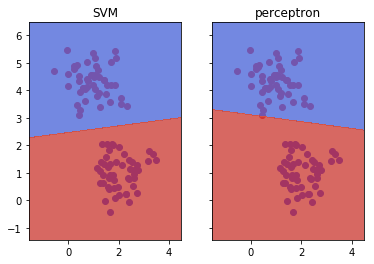

In [39]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import sklearn.datasets
import sklearn.linear_model


def plot_points(points, ax, color):
    ax.scatter(points[:, 0], points[:, 1], c=color)
    

def plot_dataset(X, Y, ax):
    for x, col in zip([X[Y==0], X[Y==1]], ['r', 'b']):
        plot_points(x, ax, col)
        

def mesh_from(instances, gap=.2):
    return np.meshgrid(
        np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, gap),
        np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, gap),
    )


def plot_contours(xx, yy, ax, classifier, **parameters):
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, **parameters)


X, Y = sklearn.datasets.make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.60)
xx, yy = mesh_from(X, .001)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

for ax, loss in zip([ax1, ax2], ['hinge', 'perceptron']):
    plot_dataset(X, Y, ax)
    plot_contours(
        xx,
        yy,
        ax,
        sklearn.linear_model.SGDClassifier(alpha=0.01, max_iter=100, loss=loss).fit(X, Y),
        cmap=plt.cm.coolwarm,
        alpha=0.8
    )
    ax.set_title('SVM' if loss == 'hinge' else loss)

plt.show()

Réponse

### Pénalisation vs Généralisation

## Cross Validation

C'est ...


In [ ]:
import sklearn.model_selection



## SVM vs Random Forest

## Selection d'attribut

### OCS

### Selectionner